# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [51]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    #If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


599

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [49]:
# set up lists to hold response info
lat = []
temp = []
hum = []
cloud = []
wind = []

# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

# Viewing the straight Json
# weather_response = requests.get(query_url + city)
# weather_json = weather_response.json()
# city_id = weather_json["id"]
# city_name = weather_json["name"]




    # Loop through the list of cities and perform a request for data on each
for city in cities:
        weather_response = requests.get(query_url + city)
        weather_json = weather_response.json()
        #Error handling
        try:
            city_id = weather_json["id"]
            city_name = weather_json["name"]
        
        # Add a one second interval between queries to stay within API query limits
            time.sleep(1)
    
            response = requests.get(query_url + city).json()
            lat.append(response['coord']['lat'])
            temp.append(response['main']['temp'])
            hum.append(response['main']['humidity'])
            cloud.append(response['clouds']['all'])
            wind.append(response['wind']['speed'])
            print(f"Retrieving information for City: {city_name} and City ID is: {city_id} ")
            
        except (KeyError, IndexError):
            print("Missing city... skipping.")
        
# print(f"The latitude information received is: {lat}")
# print(f"The temperature information received is: {temp}")
# print(f"The humidity information received is: {hum}")
# print(f"The cloudyiness information received is: {cloud}")
# print(f"The wind information received is: {wind}")
# weather_json


Retrieving information for City: Ancud and City ID is: 3899695 
Retrieving information for City: Cidreira and City ID is: 3466165 
Retrieving information for City: Sokolow Podlaski and City ID is: 758626 
Retrieving information for City: Clyde River and City ID is: 5924351 
Missing city... skipping.
Retrieving information for City: Thinadhoo and City ID is: 1337610 
Retrieving information for City: Ozernovskiy and City ID is: 2122293 
Retrieving information for City: Mayo and City ID is: 6068416 
Retrieving information for City: Karksi-Nuia and City ID is: 589922 
Retrieving information for City: Laguna and City ID is: 3581398 
Retrieving information for City: Peniche and City ID is: 2264923 
Retrieving information for City: Tilichiki and City ID is: 2120591 
Retrieving information for City: Hermanus and City ID is: 3366880 
Retrieving information for City: Manavgat and City ID is: 304854 
Retrieving information for City: New Norfolk and City ID is: 2155415 
Retrieving information for 

Retrieving information for City: Upernavik and City ID is: 3418910 
Retrieving information for City: Salalah and City ID is: 286621 
Retrieving information for City: Nortelandia and City ID is: 3456248 
Retrieving information for City: Port-Gentil and City ID is: 2396518 
Retrieving information for City: Puerto Ayora and City ID is: 3652764 
Retrieving information for City: Boden and City ID is: 606531 
Retrieving information for City: Barrow and City ID is: 3833859 
Retrieving information for City: Litovko and City ID is: 2020738 
Retrieving information for City: Yangambi and City ID is: 203717 
Retrieving information for City: Batemans Bay and City ID is: 2176639 
Retrieving information for City: Chapais and City ID is: 5919850 
Retrieving information for City: Wanning and City ID is: 3220813 
Retrieving information for City: Saint-Philippe and City ID is: 6138908 
Retrieving information for City: Sebinkarahisar and City ID is: 739914 
Retrieving information for City: Busselton and C

Retrieving information for City: Kysyl-Syr and City ID is: 2021017 
Retrieving information for City: Castro and City ID is: 3896218 
Retrieving information for City: Sompeta and City ID is: 1255816 
Retrieving information for City: Tasiilaq and City ID is: 3424607 
Retrieving information for City: Katsuura and City ID is: 1865309 
Retrieving information for City: Lamballe and City ID is: 3008225 
Retrieving information for City: San Borja and City ID is: 3905792 
Retrieving information for City: Nuuk and City ID is: 3421319 
Retrieving information for City: Urdoma and City ID is: 478769 
Missing city... skipping.
Retrieving information for City: Severo-Kurilsk and City ID is: 2121385 
Retrieving information for City: Samarai and City ID is: 2132606 
Retrieving information for City: Sambava and City ID is: 1056899 
Retrieving information for City: Sinop and City ID is: 739600 
Retrieving information for City: Broome and City ID is: 2656067 
Retrieving information for City: Caucaia and C

Retrieving information for City: Meulaboh and City ID is: 1214488 
Missing city... skipping.
Retrieving information for City: Rawson and City ID is: 3839307 
Retrieving information for City: Port Lincoln and City ID is: 2063036 
Retrieving information for City: Nueva Guinea and City ID is: 3617459 
Retrieving information for City: Geraldton and City ID is: 5960603 
Retrieving information for City: Ust-Ilimsk and City ID is: 2013952 
Missing city... skipping.
Missing city... skipping.
Retrieving information for City: Otane and City ID is: 2185329 
Retrieving information for City: Bharatpur and City ID is: 1276128 
Retrieving information for City: Bandarbeyla and City ID is: 64814 
Retrieving information for City: Leningradskiy and City ID is: 2123814 
Missing city... skipping.
Retrieving information for City: Soyo and City ID is: 2236967 
Retrieving information for City: Luderitz and City ID is: 3355672 
Retrieving information for City: Chaoyang and City ID is: 2038120 
Retrieving infor

Retrieving information for City: Awjilah and City ID is: 88533 
Retrieving information for City: Mwense and City ID is: 902721 
Missing city... skipping.
Retrieving information for City: Otradnoye and City ID is: 513898 
Missing city... skipping.
Retrieving information for City: Rome and City ID is: 6539761 
Retrieving information for City: Matara and City ID is: 425378 
Retrieving information for City: Eureka and City ID is: 5563397 
Retrieving information for City: Strezhevoy and City ID is: 1490796 
Missing city... skipping.
Retrieving information for City: Ratne and City ID is: 695789 
Retrieving information for City: Chikola and City ID is: 568184 
Retrieving information for City: Myitkyina and City ID is: 1307741 
Retrieving information for City: Nouadhibou and City ID is: 2377457 
Retrieving information for City: Sayyan and City ID is: 70979 
Retrieving information for City: Sabang and City ID is: 1726279 
Missing city... skipping.
Retrieving information for City: Santiago and C

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [52]:
weather_dict = {
    "Latitude": lat,
    "Temp": temp,
    "Humidity": hum,
    "Cloudiness (%)": cloud,
    "Wind Speed (MPH)": wind
    }
weather_data = pd.DataFrame(weather_dict)
weather_data.head()    

,Latitude,Temp,Humidity,Cloudiness (%),Wind Speed (MPH)
0,-41.87,53.60,81,75,13.87
1,-30.17,71.74,76,11,16.13
2,52.41,52.00,80,100,14.30
3,70.47,30.20,68,1,17.22
4,0.53,78.21,87,100,10.21


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

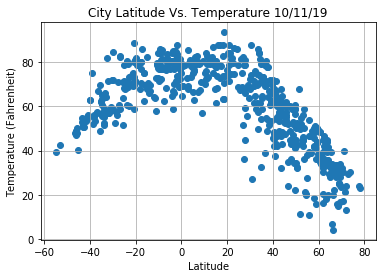

In [57]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Latitude"], weather_data["Temp"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Temperature 10/11/19")
plt.ylabel("Temperature (Fahrenheit)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

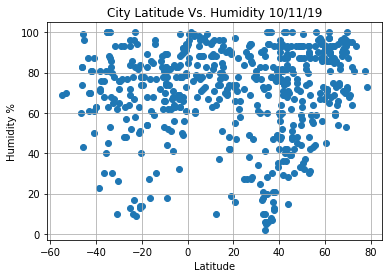

In [58]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Latitude"], weather_data["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Humidity 10/11/19")
plt.ylabel("Humidity %")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

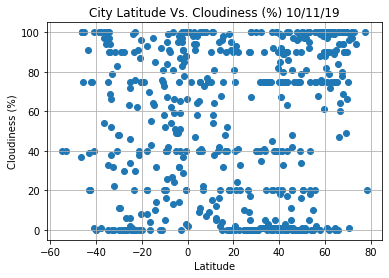

In [59]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Latitude"], weather_data["Cloudiness (%)"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Cloudiness (%) 10/11/19")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

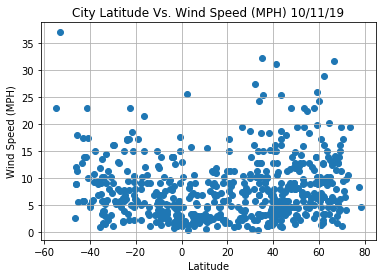

In [60]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Latitude"], weather_data["Wind Speed (MPH)"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Wind Speed (MPH) 10/11/19")
plt.ylabel("Wind Speed (MPH)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()